# Problem  - 2 Medical Analysis

## Importing Python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import time
print ("Importing Python Libraries have been sucessful")

Importing Python Libraries have been sucessful


In [2]:
initial = time.time()

## Loading the dataset in Python

In [3]:
def loading_dataset ():
    try:
        data = pd.read_csv("insurance.csv")
        return data
    except Exception as e:
        print (e)

In [4]:
data = loading_dataset ()

## Preliminary data exploration

### Head and tail of the dataset

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Shape and columns of the dataset

In [7]:
data.shape

(1338, 7)

In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Data types

In [9]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Data preprocessing

### Checking null values in the dataset

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Checking duplicate values in the dataset

In [11]:
data.duplicated().sum()

1

### Removing the duplicate values from the dataset

In [12]:
data.drop_duplicates(inplace = True)

In [13]:
data.duplicated().sum()

0

### Outliers in the dataset

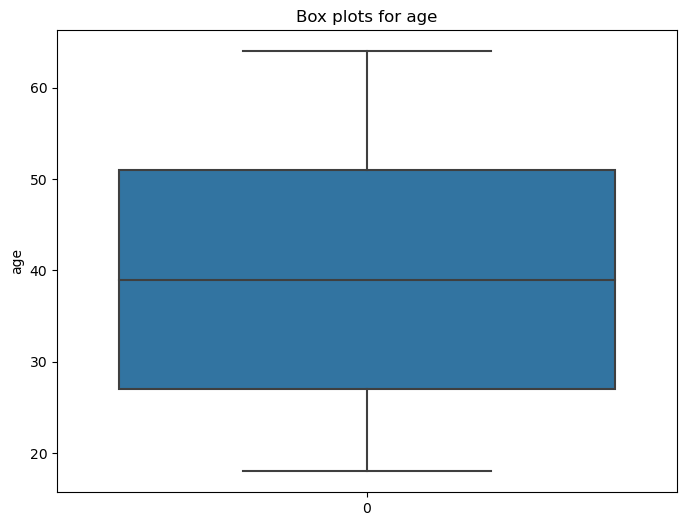

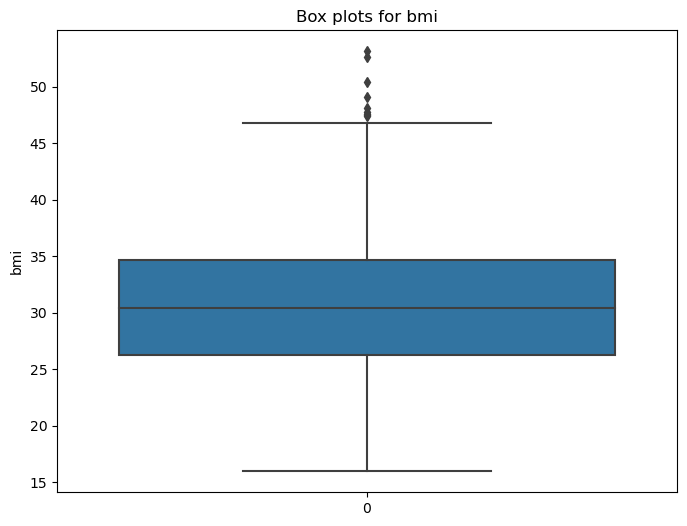

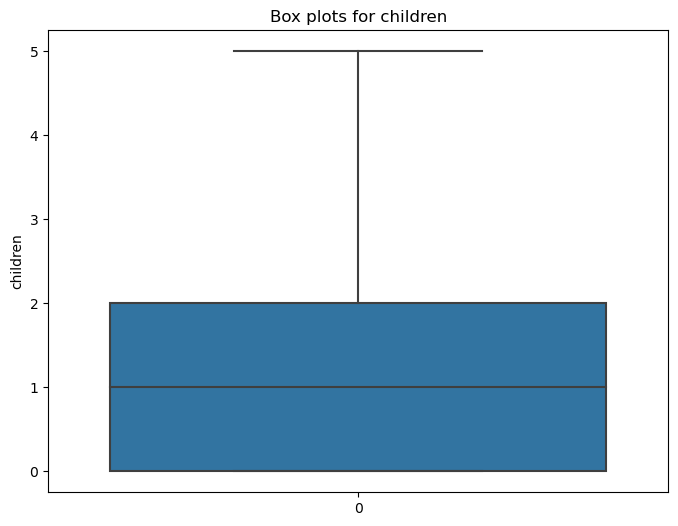

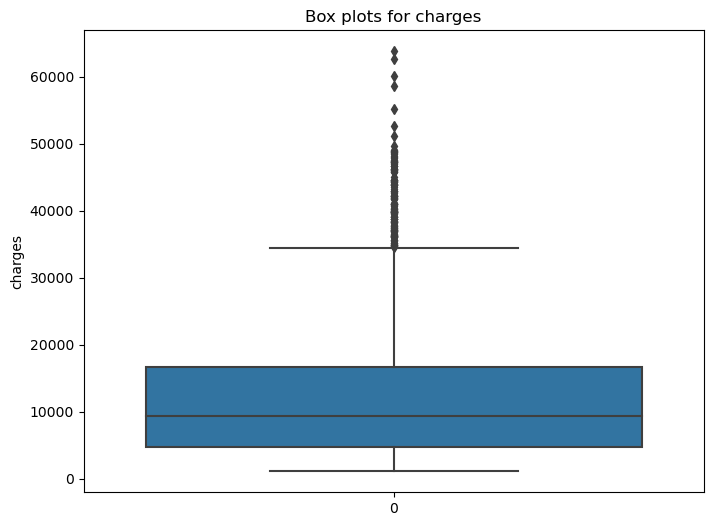

In [14]:
num_col = data.select_dtypes(include = 'number')
for i in num_col:
    plt.figure(figsize = (8,6))
    sns.boxplot(data = num_col[i])
    plt.title (f"Box plots for {i}")
    plt.ylabel(i)
    plt.show()

## Exploratory Data Analysis (EDA)

### Summary statistics

In [15]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Distribution of age across gender

<Figure size 600x600 with 0 Axes>

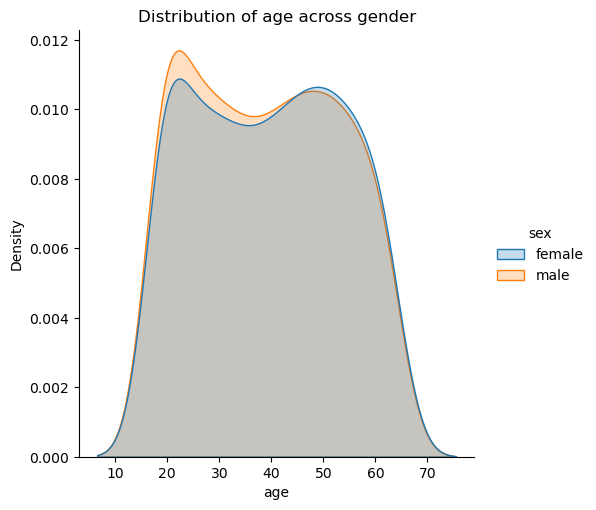

In [16]:
plt.figure(figsize = (6,6))
sns.displot(data = data, x = 'age', hue = 'sex', kind = 'kde', fill = True)
plt.title("Distribution of age across gender")
plt.show()

### Histogram plot for BMI

<Figure size 600x800 with 0 Axes>

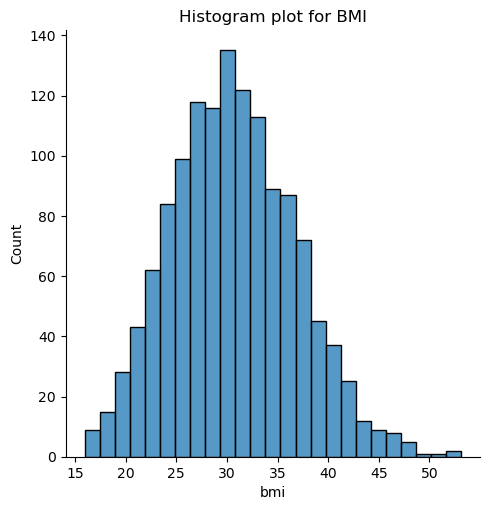

In [17]:
plt.figure(figsize = (6,8))
sns.displot(data = data, x = 'bmi')
plt.title("Histogram plot for BMI")
plt.show()

### BMI across Sex

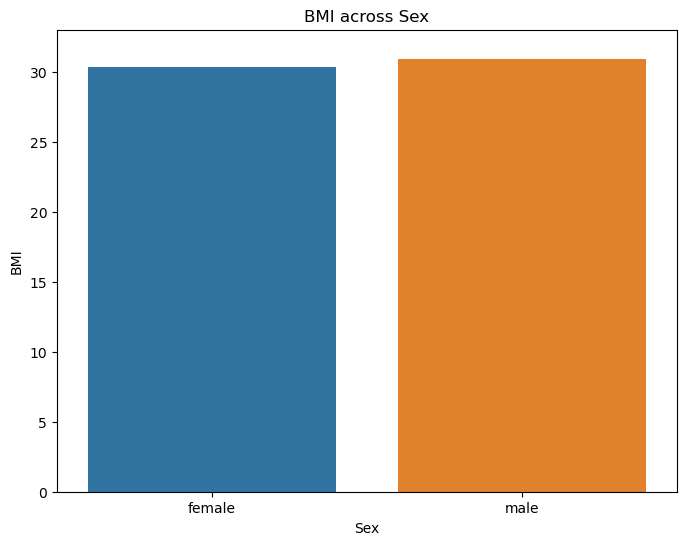

In [18]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'sex', y = 'bmi', errwidth = 0)
plt.title("BMI across Sex")
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

### Insurance Charges across regions

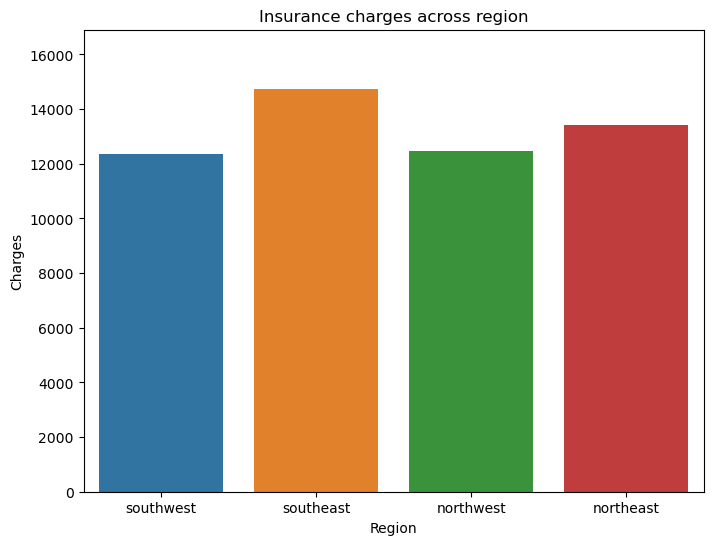

In [19]:
plt.figure(figsize = (8,6))
sns.barplot(data = data, x = 'region', y = 'charges', errwidth = 0)
plt.title("Insurance charges across region")
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

### Relationship between age and charges across states

<Figure size 800x800 with 0 Axes>

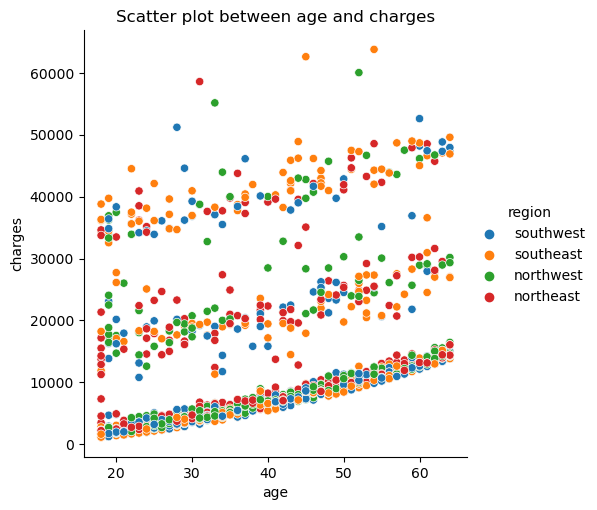

In [20]:
plt.figure(figsize = (8,8))
sns.relplot(data = data, x = 'age', y = 'charges', hue = 'region')
plt.title("Scatter plot between age and charges")
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

### Correlation Heatmap

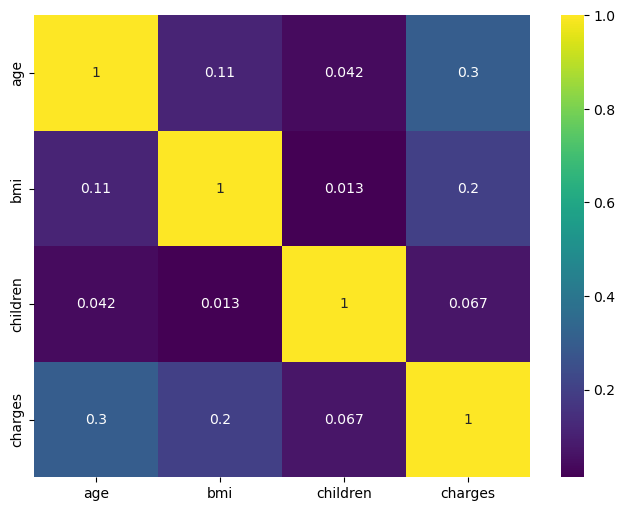

In [21]:
num_col = data.select_dtypes(include = 'number')
plt.figure(figsize = (8,6))
sns.heatmap(data = num_col.corr(), annot = True, cmap = 'viridis')
plt.show()

## Machine Learning Models

### label Encoding for region column

In [22]:
label_encoder = LabelEncoder()

In [23]:
data['region_numeric'] = label_encoder.fit_transform(data['region'])

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges,region_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,3
1,18,male,33.770,1,no,southeast,1725.55230,2
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


### Features and target variable

In [25]:
X = data[['age', 'bmi', 'children', 'region_numeric']]

In [26]:
y = data['charges']

### Scaling the Numerical variables

In [27]:
standard_scalar = StandardScaler()

In [28]:
standard_scalar.fit(X, y)

StandardScaler()

In [29]:
X_scaled = standard_scalar.fit_transform(X)

### Data splitting

In [30]:
X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, test_size = 0.20, random_state = 1234)

In [31]:
X_train.shape

(1069, 4)

In [32]:
X_test.shape

(268, 4)

### Multiple Linear Regression Model

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
lr_pred = lr.predict(X_test)

In [36]:
lr_r2 = r2_score(y_test, lr_pred)
print ("The R-square value is: ", lr_r2)

The R-square value is:  0.13384082386781737


In [37]:
lr_mse = mean_squared_error(y_test, lr_pred)
print ("The MSE value is: ", lr_mse)
print ("The RMSE value is: ", np.sqrt(lr_mse))

The MSE value is:  126219922.97881015
The RMSE value is:  11234.764037522556


### KNN Regressor

In [38]:
knn = KNeighborsRegressor(n_neighbors = 17)

In [39]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=17)

In [40]:
knn_pred = knn.predict(X_test)

In [41]:
knn_r2 = r2_score(y_test, knn_pred)
print("The R-square values is: ", knn_r2)

The R-square values is:  0.12662508518088478


In [42]:
knn_mse = mean_squared_error (y_test, knn_pred)
print("The MSE of the model is: ", knn_mse)
print("The RMSE of the model is: ", np.sqrt(knn_mse))

The MSE of the model is:  127271427.14386083
The RMSE of the model is:  11281.463874154844


### Random Forest Regressor

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
xgb = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.01, min_samples_split=2, min_samples_leaf=1, validation_fraction = 0.05)

In [45]:
xgb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, validation_fraction=0.05)

In [46]:
xgb_pred = xgb.predict(X_test)

In [47]:
xgb_r2 = r2_score(y_test, xgb_pred)
print("The R-square value of the model is: ", xgb_r2)

The R-square value of the model is:  0.09942027810916709


In [48]:
mse_xgb = mean_squared_error (y_test, xgb_pred)
print ("The MSE of the model is: ", mse_xgb)
print ("The RMSE of the model is: ", np.sqrt(mse_xgb))

The MSE of the model is:  131235812.38374147
The RMSE of the model is:  11455.820022317977


In [49]:
final = time.time()
print (f"Total Execution time is: {final-initial} seconds")

Total Execution time is: 2.553152084350586 seconds


### User Interface

In [50]:
import tkinter as tk
from tkinter import ttk
# Encode the 'region' column
label_encoder = LabelEncoder()
data['region_numeric'] = label_encoder.fit_transform(data['region'])

# Define features and target variable
X = data[['age', 'bmi', 'children', 'region_numeric']]
y = data['charges']

# Standardize the features and train the model outside the function
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lr = LinearRegression()
lr.fit(X_scaled, y)

# Function to predict insurance charges
def predict_charges():
    try:
        age = float(age_var.get())
        bmi = float(bmi_var.get())
        children = int(children_var.get())
        region = region_var.get()
        
        # Encode the region input
        region_numeric = label_encoder.transform([region])[0]
        
        # Prepare the input data
        user_data = np.array([[age, bmi, children, region_numeric]])
        user_data_scaled = scaler.transform(user_data)  # Use scaler here
        
        # Make prediction
        prediction = lr.predict(user_data_scaled)
        
        # Display the prediction
        result_var.set(f"Predicted Insurance Charges: ${prediction[0]:.2f}")
    except ValueError:
        result_var.set("Please enter valid inputs.")
    except Exception as e:
        result_var.set(f"Error: {e}")

# Creating the main window
root = tk.Tk()
root.title("Insurance Charges Prediction")
root.configure(bg='light blue')  # Set background color

# Defining variables for storing user inputs
age_var = tk.StringVar()
bmi_var = tk.StringVar()
children_var = tk.StringVar()
region_var = tk.StringVar()
result_var = tk.StringVar()

# Creating input fields and labels with color customization
tk.Label(root, text="Age", bg='light blue', fg='blue').grid(row=0, column=0, padx=10, pady=10)
tk.Entry(root, textvariable=age_var, bg='white').grid(row=0, column=1, padx=10, pady=10)

tk.Label(root, text="BMI", bg='light blue', fg='blue').grid(row=1, column=0, padx=10, pady=10)
tk.Entry(root, textvariable=bmi_var, bg='white').grid(row=1, column=1, padx=10, pady=10)

tk.Label(root, text="Number of Children", bg='light blue', fg='blue').grid(row=2, column=0, padx=10, pady=10)
tk.Entry(root, textvariable=children_var, bg='white').grid(row=2, column=1, padx=10, pady=10)

tk.Label(root, text="Region", bg='light blue', fg='blue').grid(row=3, column=0, padx=10, pady=10)
region_dropdown = ttk.Combobox(root, textvariable=region_var)
region_dropdown['values'] = list(label_encoder.classes_)
region_dropdown.grid(row=3, column=1, padx=10, pady=10)

# Button to trigger prediction with color customization
tk.Button(root, text="Predict", command=predict_charges, bg='blue', fg='white').grid(row=4, column=0, columnspan=2, pady=20)

# Label to display the result with color customization
tk.Label(root, textvariable=result_var, font=("Arial", 14), bg='light blue', fg='red').grid(row=5, column=0, columnspan=2, pady=10)

# Start the Tkinter event loop
root.mainloop()

C:\Users\tarun\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
